In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

In [5]:
rec = pd.read_csv('rec_read.csv', delimiter=';', header=None)
rec.columns = ['date','action','country','user_id','topic']
rec['date'] = pd.to_datetime(rec['date']).dt.date

In [6]:
rec

,date,action,country,user_id,topic
0,2018-01-01,read,country_5,2458151287,North America
1,2018-01-01,read,country_4,2458151279,Asia
2,2018-01-01,read,country_4,2458151525,Africa
3,2018-01-01,read,country_5,2458151287,Asia
4,2018-01-01,read,country_5,2458151315,South America
...,...,...,...,...,...
371849,2018-03-31,read,country_4,2458361163,Africa
371850,2018-03-31,read,country_6,2458361177,Asia
371851,2018-03-31,read,country_7,2458361244,North America
371852,2018-03-31,read,country_7,2458361267,Europe


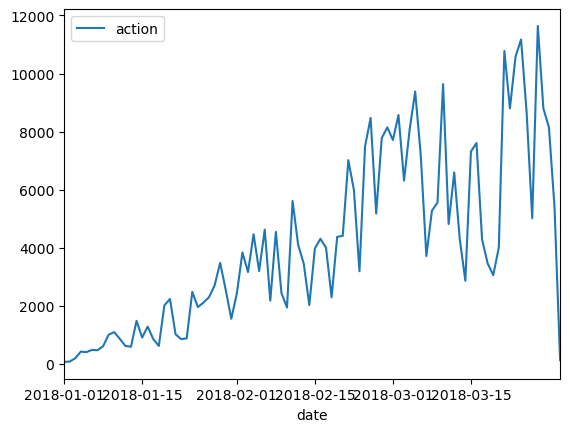

In [7]:
rec.groupby('date').count()[['action']].plot()

In [8]:
recers = rec.groupby('date').count()[['action']]

In [9]:
okform = recers.reset_index(drop = True).action

In [10]:
okform.tail

<bound method NDFrame.tail of 0        72
1        84
2       197
3       427
4       409
      ...  
85    11640
86     8801
87     8143
88     5395
89      132
Name: action, Length: 90, dtype: int64>

In [11]:
x = okform.index
y = okform.values

In [22]:
coefs = np.polyfit(x, y, 1)
predict = np.poly1d(coefs)

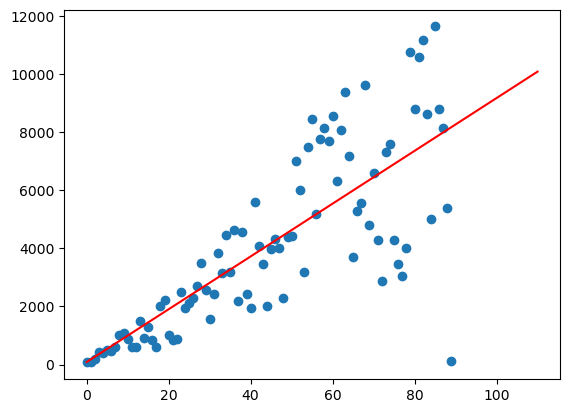

In [23]:
x_test = np.linspace(0, 110)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.show()

In [21]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.6155697615667903